

# HW 2: Analyzing IMDb Data

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

The csv data can be downloaded from https://drive.google.com/open?id=12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l for your offline use purpose

## Part 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline



In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.1MB/s 


In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l'}) # replace the id with id of file you want to access
downloaded.GetContentFile('imdb_1000.csv') 

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [0]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    979 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [0]:
movies.iloc[1:2,1:3]

,title,content_rating
1,The Godfather,R


In [0]:
movies.loc[:,'title']

0                               The Shawshank Redemption
1                                          The Godfather
2                                 The Godfather: Part II
3                                        The Dark Knight
4                                           Pulp Fiction
5                                           12 Angry Men
6                         The Good, the Bad and the Ugly
7          The Lord of the Rings: The Return of the King
8                                       Schindler's List
9                                             Fight Club
10     The Lord of the Rings: The Fellowship of the Ring
11                                             Inception
12        Star Wars: Episode V - The Empire Strikes Back
13                                          Forrest Gump
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
16                       One Flew Over the Cuckoo's Nest
17                             

#### Check the number of rows and columns.

In [0]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [0]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [0]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [0]:
# Answer:
longest_index = movies.duration.argmin() # or dataframe.column.idxmax()
movies.iloc[longest_index]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


star_rating                                                       8
title                                                        Freaks
content_rating                                              UNRATED
genre                                                         Drama
duration                                                         64
actors_list       [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...
Name: 389, dtype: object

In [0]:
longest_index = movies.duration.argmax() 
movies.iloc[longest_index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


star_rating                                                     7.8
title                                                        Hamlet
content_rating                                                PG-13
genre                                                         Drama
duration                                                        242
actors_list       [u'Kenneth Branagh', u'Julie Christie', u'Dere...
Name: 476, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

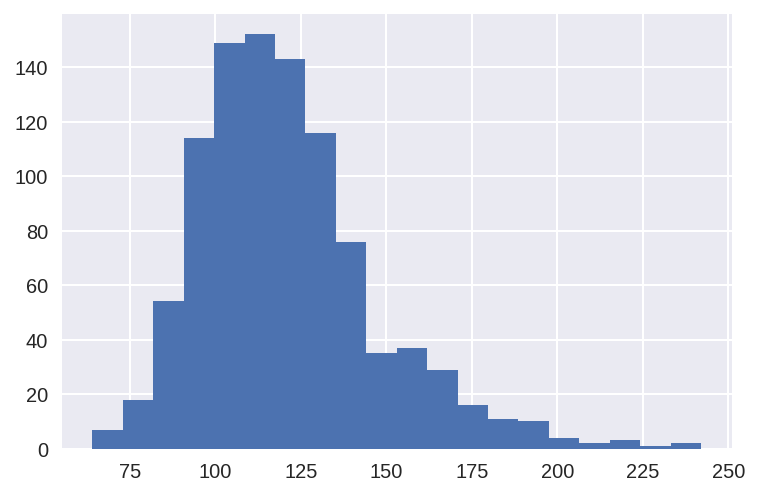

In [0]:
# Answer:
#20 bins for 1000 numbers
movies.duration.hist(bins=20)

#### Use a box plot to display that same data.

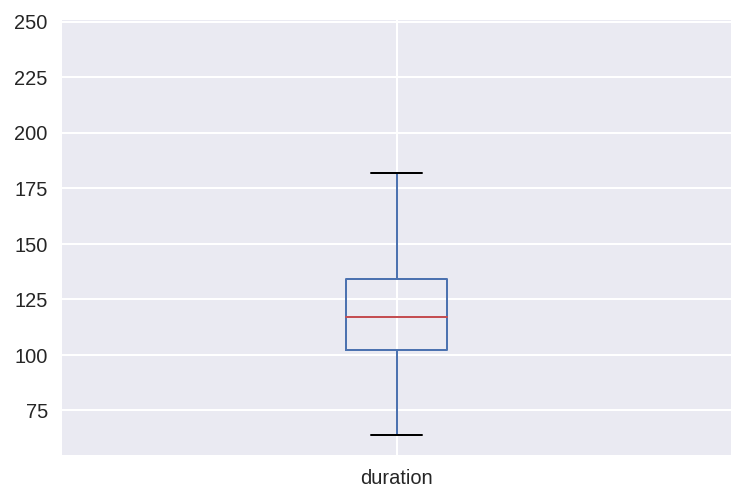

In [0]:
# Answer:

movies.duration.plot(kind='box')

## Part 2

#### Count how many movies have each of the content ratings.

In [0]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Total Numbers')

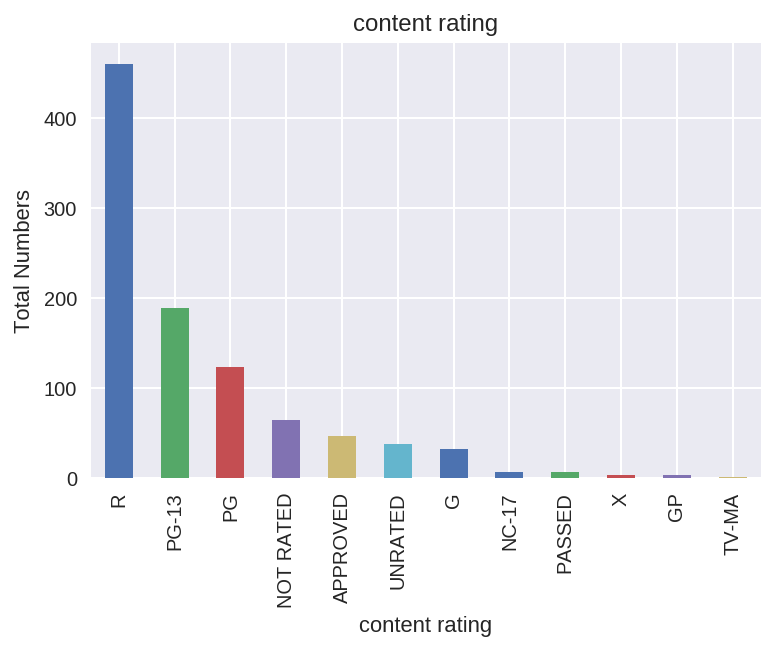

In [0]:
# Answer:
content_rating_count=movies['content_rating'].value_counts()
content_rating=content_rating_count.plot(kind='bar', title='content rating')
content_rating.set_xlabel("content rating")
content_rating.set_ylabel("Total Numbers")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [0]:
# Answer:
movies.replace({'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED'}, inplace=True)
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [0]:
# Answer:
movies.replace({'X':'NC-17','TV-MA':'NC-17'},inplace=True)
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [0]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [0]:
# Answer:
#First, I find the three movies which content_rating is null
movies[movies.content_rating.isnull()]
movies.content_rating.fillna('UNRATED', inplace=True)

In [0]:
#I use .ilo to check if the missing value is updated 
movies.iloc[187]

star_rating                                                     8.2
title                            Butch Cassidy and the Sundance Kid
content_rating                                              UNRATED
genre                                                     Biography
duration                                                        110
actors_list       [u'Paul Newman', u'Robert Redford', u'Katharin...
Name: 187, dtype: object

In [0]:
movies.iloc[649]

star_rating                                                     7.7
title                                             Where Eagles Dare
content_rating                                              UNRATED
genre                                                        Action
duration                                                        158
actors_list       [u'Richard Burton', u'Clint Eastwood', u'Mary ...
Name: 649, dtype: object

In [0]:
movies.iloc[936]

star_rating                                                   7.4
title                                                   True Grit
content_rating                                            UNRATED
genre                                                   Adventure
duration                                                      128
actors_list       [u'John Wayne', u'Kim Darby', u'Glen Campbell']
Name: 936, dtype: object

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [0]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [0]:
# Answer:
movies[movies.duration>=120].star_rating.mean()


7.948898678414082

In [0]:
movies[movies.duration<120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

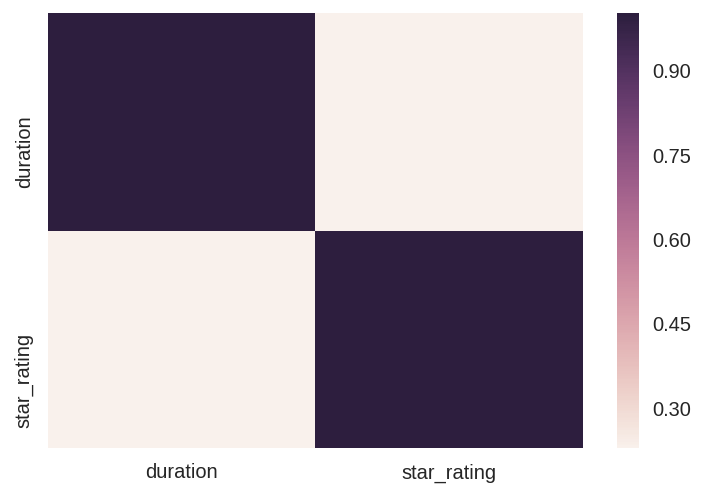

In [0]:
# Answer
sns.heatmap(movies[['duration','star_rating']].corr())

#### Calculate the average duration for each genre.

In [0]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

#### Visualize the relationship between content rating and duration.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


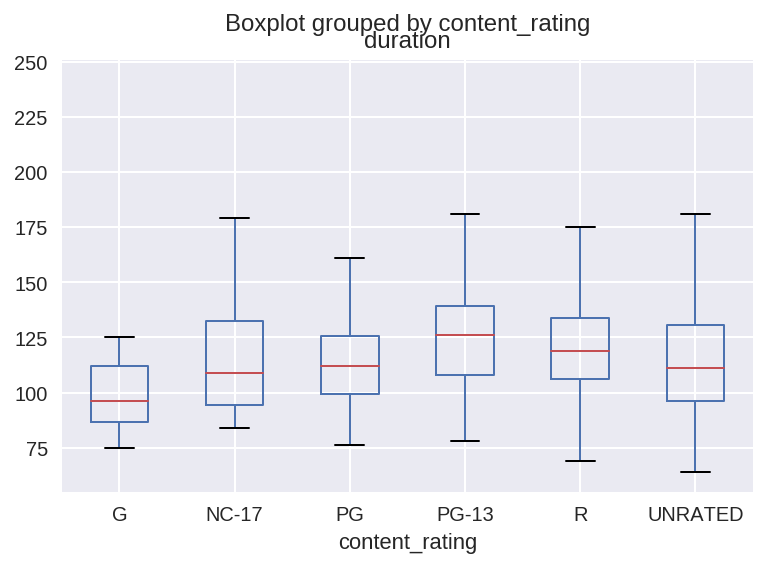

In [0]:
# Answer:
movies.boxplot(column='duration', by='content_rating')
movies.head()

#### Determine the top rated movie (by star rating) for each genre.

In [0]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [0]:
# Answer:
#find the movies with dupulicated title 
dupli_titles=movies[movies.duplicated('title')].title
#check if they are actually duplicates
movies[movies.title.isin(dupli_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [0]:
# Answer:
#count the number of movies by genre
movies.genre.value_counts()
#manually create a list of genres with at least 10 movies
Top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
#find the movies which are in Top_genres list. Group them by genre. Then find the star rating mean.
movies[movies.genre.isin(Top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [0]:
# Answer:
#count the number of movies by genre
genre_counts = movies.genre.value_counts()
#automatically create a list of relevant genres using index
top_genres = genre_counts[genre_counts >= 10].index
#find the movies which are in Top_genres list. Group them by genre. Then find the star rating mean.
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [0]:
# Answer:

movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [0]:
# Answer:
#calculate the mean and count
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
#filter the count
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [0]:
#Find how many movies are performed by each actor
#clean the data
def clean(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
#Apply that function to every entry    
movies_series = movies['actors_list'].apply(clean)
#Declare a list to store the split values
actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
#Declare a dictionary and see if the actor name key exist and then count accordingly.
actor_dict = {}
for actor in actors_list:
    for a in actor:
      #if the actor's name is in the dictionary, the counting number plus 1
        if a in actor_dict:
            actor_dict[a] +=1
      #if the actor's name is not in the dictionary, the counting number shows 1
        else:
            actor_dict[a] = 1

actor_dict

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\xf4 Mifune': 3,
 'Takashi Shimura': 2